In [1]:
# Copyright 2017 Junghoon Lee
#   jhoon.chris@gmail.com

In [2]:
import pandas_datareader as pdr
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
def get_input_feature(ticker, start_date, end_date):
    
    return pdr.get_data_yahoo(ticker,start_date, end_date)

In [4]:
###################################
# make input features
###################################
# read IVV stock data
import datetime

now = datetime.datetime.now()
end_date = now.strftime("%Y-%m-%d")
print end_date
                        
ivv = get_input_feature('IVV','2016-01-01', end_date)
gld = get_input_feature('GLD','2016-01-01', end_date)


2017-12-13


In [16]:
# nomalize Adj close price
# nomalize Volume
#print ivv.head()
nm_ivv = ivv.copy(deep=True)
nm_ivv['Adj Close'] = nm_ivv['Adj Close']/nm_ivv['Adj Close'][0]
nm_ivv['Volume'] = nm_ivv['Volume']/nm_ivv['Volume'].mean()
nm_ivv['Open'] = (nm_ivv['Close']-nm_ivv['Open'])/nm_ivv['Open']
nm_ivv['High'] = (nm_ivv['High']-nm_ivv['Low'])/nm_ivv['Low']
nm_ivv = nm_ivv.rename(columns = {'Open':'Change'})
nm_ivv = nm_ivv.rename(columns = {'High':'Maxofday'})
#print nm_ivv.head()

#print gld.head()
nm_gld = gld.copy(deep=True)
nm_gld['Adj Close'] = nm_gld['Adj Close']/nm_gld['Adj Close'][0]
nm_gld['Volume'] = nm_gld['Volume']/nm_gld['Volume'].mean()
#print nm_gld.head()

# Rolling Mean 20 days
rm20_ivv = pd.rolling_mean(nm_ivv['Adj Close'], window=20)
rm20_ivv_ = pd.DataFrame(rm20_ivv)
rm20_ivv_ = rm20_ivv_.rename(columns = {'Adj Close':'RM20'})

# Rolling Mean 40 days
rm40_ivv = pd.rolling_mean(nm_ivv['Adj Close'], window=40)
rm40_ivv_ = pd.DataFrame(rm40_ivv)
rm40_ivv_ = rm40_ivv_.rename(columns = {'Adj Close':'RM40'})

prices = nm_ivv['Adj Close']

#print gld.head()
gold = nm_gld.drop(['Open', 'High', 'Close', 'Low', 'Volume'], axis = 1)
gold = gold.rename(columns = {'Adj Close':'GLD'})
#print gold.head()
#print "gold.dtypes", gold.dtypes

features = nm_ivv.drop(['Adj Close', 'Low', 'Close'], axis = 1)
features = features.join(gold, how='inner')
features = features.join(rm20_ivv_, how='inner')
features = features.join(rm40_ivv_, how='inner')

print features.head()

              Change  Maxofday    Volume       GLD  RM20  RM40
Date                                                          
2016-01-04  0.002631  0.012125  2.016095  1.000000   NaN   NaN
2016-01-05  0.000544  0.009152  1.425954  1.002819   NaN   NaN
2016-01-06  0.002057  0.012338  1.489472  1.017300   NaN   NaN
2016-01-07 -0.006673  0.019684  2.044548  1.031684   NaN   NaN
2016-01-08 -0.016876  0.022283  2.412838  1.027116   NaN   NaN


/home/chrisle/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:20: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
/home/chrisle/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:25: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=40,center=False).mean()


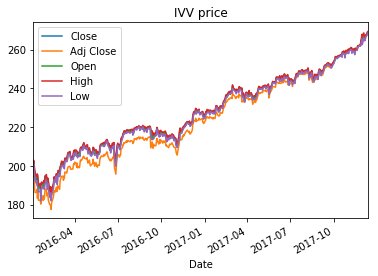

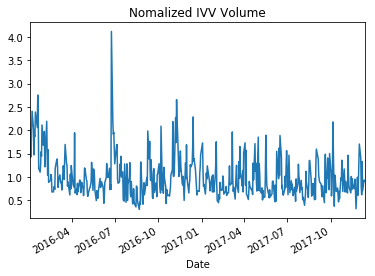

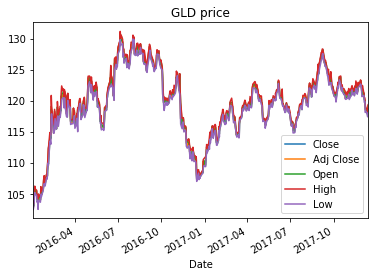

In [17]:
##################################
# check input features using graph
#################################
# plot IVV stock 
import pandas as pd 
import matplotlib.pyplot as plt

ivv[['Close','Adj Close', 'Open', 'High', 'Low']].plot(title='IVV price')
plt.show()

nm_ivv['Volume'].plot(title='Nomalized IVV Volume')
plt.show()

gld[['Close','Adj Close', 'Open', 'High', 'Low']].plot(title='GLD price')
plt.show()


Training set has 377 samples.
Testing set has 45 samples.
[ 1.28113807  1.30019196  1.14685129  1.27278172  1.30821756  1.29739905
  1.2899296   1.29207103  1.30271234  1.29500102  1.2763251   1.28342625
  1.25611407  1.30586969  1.28136204  1.25443983  1.28134565  1.30574251
  1.27851545  1.2505381   1.27378483  1.25052061  1.2963482   1.28387917
  1.30237873  1.30865661  1.28982304  1.30386468  1.28370308  1.30603534
  1.29599647  1.2960573   1.26409953  1.30408653  1.30214886  1.29590912
  1.27420077  1.30596931  1.30654367  1.25068819  1.25443097  1.26432121
  1.30695632  1.30266377  1.30635038]
n_neighbors : 2
Mean squared error: 0.00
Variance score: -10.40
[ 1.27994777  1.29536198  1.12582101  1.26512455  1.29774504  1.28677587
  1.28142182  1.28251637  1.28877872  1.28643041  1.26862337  1.28331711
  1.27147414  1.2872091   1.27816005  1.27093762  1.27989635  1.28278124
  1.26743245  1.2625021   1.28235892  1.26012932  1.28649411  1.27888676
  1.28716818  1.29997872  1.29030575 

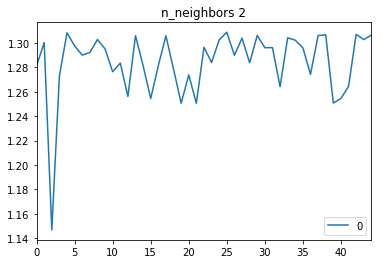

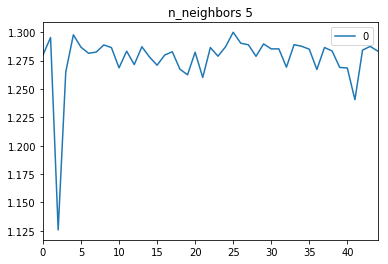

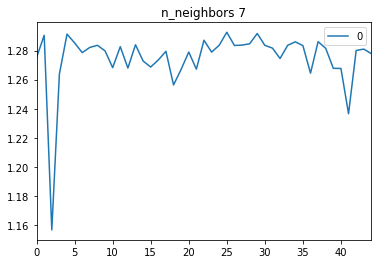

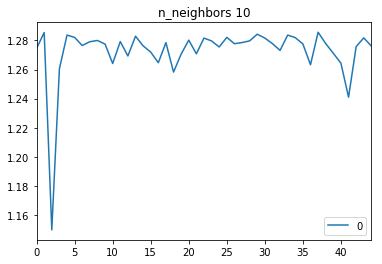

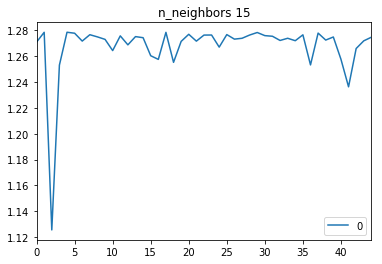

In [18]:
# do knn regression

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from pandas import Series, DataFrame, Panel

X_train = features[65:-50]
y_train = prices[70:-45]
X_test = features[-50:-5]
y_test = prices[-45:]

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])


for count, n_neighbors in enumerate([2, 5, 7, 10, 15]):
    neigh = KNeighborsRegressor(n_neighbors, weights='distance')
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    print y_pred
    LR_result = pd.DataFrame(y_pred)
    LR_result.plot(title="n_neighbors %d" % n_neighbors)
    # The mean squared error
    print("n_neighbors : %d" % n_neighbors)
    print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(y_test, y_pred))
    
plt.show()

[ 1.34598986  1.33642835  1.3559871   1.34588722  1.34588722]
            Prediction
Date                  
2017-12-14  262.540008
2017-12-15  260.675004
2017-12-16  264.490005
2017-12-17  262.519989
2017-12-18  262.519989


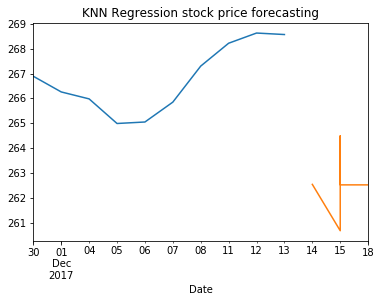

In [19]:
# Predict future 1-week
X_train = features[65:-5]
y_train = prices[70:]
X_future = features[-5:]

from sklearn.metrics import mean_squared_error, r2_score

neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test.values)

# Make predictions using the testing set
y_future = neigh.predict(X_future)

print y_future

start_predict_day = now+datetime.timedelta(1)
end_predict_day = now+datetime.timedelta(5)
start_predict_day = start_predict_day.strftime("%Y-%m-%d")
end_predict_day = end_predict_day.strftime("%Y-%m-%d")

days = pd.date_range(start_predict_day, end_predict_day, freq='D')

df = pd.DataFrame({'Date': days, 'Prediction': y_future})
df = df.set_index('Date')
df['Prediction'] = df['Prediction'] * ivv['Adj Close'][0]
print df 

real_prices = prices[-10:] * ivv['Adj Close'][0]
ax = real_prices.plot()
df['Prediction'].plot(title='KNN Regression stock price forecasting', ax = ax)
plt.show()